# Dataset Analysis
In this notebook we analyse dataset properties that we report in our reproducability paper. The notebook is split per dataset i.e. Adult, CelebA, CheXpert and Civil Comments. To be able to run this notebook, these datasets have to be downloaded.

In [3]:
from data import *
import matplotlib.pyplot as plt

# General statistics for Adult
adult_train, _ = get_train_validation_set("adult")
adult_test = get_test_set("adult")

adult_train_rows = len(adult_train)
adult_test_rows = len(adult_test)
adult_nr_dropped_rows = len(adult_train._dropped_rows)

summary_adult = ("The Adult dataset has {} train and {} test samples." +  \
                "The amount of training rows has been reduced by {} rows to introduce bias").format(adult_train_rows, adult_test_rows, adult_nr_dropped_rows)

print(summary_adult)

# Visualizing the normalized continous columns of Adult
train = adult_train._table

for column in ADULT_CONTINOUS:
    print(column)
    train[column].plot(kind='hist')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/adult\\adult.data'

In [7]:
from data import *
import matplotlib.pyplot as plt

# General statistics for Adult
civil_train, _ = get_train_validation_set("civil")
civil_test = get_test_set("civil")

civil_train_rows = len(civil_train)
civil_test_rows = len(civil_test)

summary_adult = ("The Adult dataset has {} train and {} test samples.").format(civil_train_rows, civil_test_rows)

print(summary_adult)

# Visualizing the normalized continous columns of Adult


# for column in ADULT_CONTINOUS:
#     print(column)
#     train[column].plot(kind='hist')
#     plt.show()

Using cache found in C:\Users\fabia/.cache\torch\hub\huggingface_pytorch-transformers_master
Using cache found in C:\Users\fabia/.cache\torch\hub\huggingface_pytorch-transformers_master


The Adult dataset has 370646 train and 5811 test samples.


Average comment length is 343.2400835298371


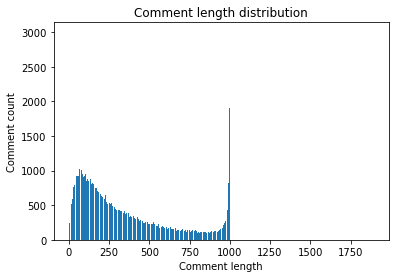

In [9]:
from collections import defaultdict

train = civil_train._alldata_table
train_text = train["comment_text"]

count = 0
total_length = 0
for i in train_text:
    count += 1 
    total_length += len(i)
print("Average comment length is {}".format(total_length/count))


len_dict = defaultdict(lambda: 0)
for i in train_text:
    len_dict[len(i)] += 1
sorted_dict_list = sorted(len_dict.items())
x = []
y = []
for i in sorted_dict_list:
    x.append(i[0])
    y.append(i[1])

plt.bar(x, y)
plt.xlabel("Comment length")
plt.ylabel("Comment count")
plt.title("Comment length distribution")
plt.savefig("Comment_length_distribution.png")
plt.show()
    

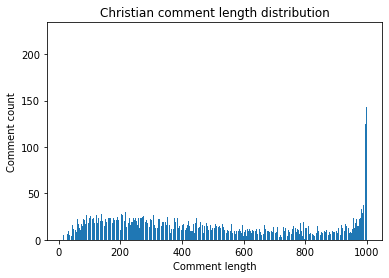

In [10]:
train_christian = train["christian"]

len_dict = defaultdict(lambda: 0)
for i, j in zip(train_text, train_christian):
    if j == 1.0:
        len_dict[len(i)] += 1
sorted_dict_list = sorted(len_dict.items())
x = []
y = []
for i in sorted_dict_list:
    x.append(i[0])
    y.append(i[1])


plt.bar(x, y)
plt.xlabel("Comment length")
plt.ylabel("Comment count")
plt.title("Christian comment length distribution")
plt.savefig("Christian_comment_length.png")
plt.show()

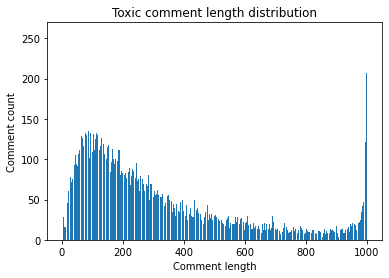

In [36]:
train_toxicity = train["toxicity"]

len_dict = defaultdict(lambda: 0)
for i, j in zip(train_text, train_toxicity):
    if j >= 0.5:
        len_dict[len(i)] += 1
sorted_dict_list = sorted(len_dict.items())
x = []
y = []
for i in sorted_dict_list:
    x.append(i[0])
    y.append(i[1])


plt.bar(x, y)
plt.xlabel("Comment length")
plt.ylabel("Comment count")
plt.title("Toxic comment length distribution")
plt.show()

In [4]:
celeba_train, _ = get_train_validation_set("celeba")
celeba_test = get_test_set("celeba")

celeba_train_rows = len(celeba_train)
celeba_test_rows = len(celeba_test)

summary_celeba = ("The celeba dataset has {} train and {} test samples.").format(celeba_train_rows, celeba_test_rows)

print(summary_celeba)

The celeba dataset has 162770 train and 19962 test samples.


In [5]:
train = celeba_train.anno_table
train_rows = train[["image", "Blond_Hair", "Male"]]
blond_rows = train_rows["Blond_Hair"]
male_rows = train_rows["Male"]
image_rows = train_rows["image"]

male_images = []
blond_images = []
blond_male_images = []

for i, j in zip(image_rows, male_rows):
    if j == 1:
        male_images.append(i)

for i, j in zip(image_rows, blond_rows):
    if j == 1:
        blond_images.append(i)

for i, j, k in zip(image_rows, blond_rows, male_rows):
    if j == 1 and k == 1:
        blond_male_images.append(i)
  

print("The dataset consists of {} percent of Male images".format((len(male_images) / len(train_rows))*100))
print("The dataset consists of {} percent of Blond images".format((len(blond_images) / len(train_rows))*100))
print("The blond images consist of {} percent of Blond Male images".format((len(blond_male_images) / len(blond_images))*100))



The dataset consists of 41.93708914419119 percent of Male images
The dataset consists of 14.908766971800699 percent of Blond images
The blond images consist of 5.715580829933655 percent of Blond Male images


In [12]:
from tqdm.notebook import tqdm_notebook


import os, numpy, PIL
from PIL import Image

all_images = os.listdir("data/celeba/img_align_celeba")
w, h = Image.open("data/celeba/img_align_celeba/" + all_images[0]).size
N = len(blond_male_images)

average_array = numpy.zeros((h, w, 3), numpy.float)

for image in tqdm_notebook(blond_male_images):
    image_array = numpy.array(Image.open("data/celeba/img_align_celeba/" + image), dtype = numpy.float)
    average_array = average_array + image_array/N

average_array = numpy.array(numpy.round(average_array), dtype = numpy.uint8)

output = Image.fromarray(average_array, mode="RGB")
output.save("blond_male_average.png")
output.show()


C:\Users\fabia\AppData\Local\Temp/ipykernel_18160/2592794232.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  average_array = numpy.zeros((h, w, 3), numpy.float)


  0%|          | 0/1387 [00:00<?, ?it/s]

C:\Users\fabia\AppData\Local\Temp/ipykernel_18160/2592794232.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image_array = numpy.array(Image.open("data/celeba/img_align_celeba/" + image), dtype = numpy.float)
